In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv("heart_attack_prediction_dataset.csv")

In [90]:
df.head(5)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


Dataset Description -How many features?

-Classification or regression problem? Why do you think so?


In [91]:
df.shape

(8763, 26)

<h1>Data Preprocessing </h1>

In [92]:
# Null values

# String or Object values (Encoding)

#Scaling


In [93]:
#Null values

df.isna().sum()


Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [94]:
#Encoding

In [95]:
df.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [96]:
df.nunique()

Patient ID                         8763
Age                                  73
Sex                                   2
Cholesterol                         281
Blood Pressure                     3915
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8763
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8763
Income                             8615
BMI                                8763
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Country                              20
Continent                             6
Hemisphere                            2


In [97]:
df.head(5)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [98]:
# Spliting Blood Pressure
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

In [99]:
# Convert the columns to numeric
df['Systolic'] = pd.to_numeric(df['Systolic'])
df['Diastolic'] = pd.to_numeric(df['Diastolic'])

In [100]:
df = df.drop("Blood Pressure", axis = 1)

In [101]:
df.head(5)

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
0,BMW7812,67,Male,208,72,0,0,1,0,0,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,21,Male,389,98,1,1,1,1,1,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,BNI9906,21,Female,324,72,1,0,0,0,0,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,JLN3497,84,Male,383,73,1,1,1,0,1,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,66,Male,318,93,1,1,1,1,0,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


In [102]:
df.shape

(8763, 27)

In [103]:
df.dtypes


Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent                           object
Hemisphere 

In [104]:
from sklearn.preprocessing import LabelEncoder

In [105]:
encoder = LabelEncoder()

In [106]:
# fit()->test()->transform()
for col_name in df.columns:
    if df[col_name].dtype == "object" and df[col_name].nunique() <= 20:
        df[col_name] = encoder.fit_transform(df[[col_name]])
        

C:\Users\ANJAR\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANJAR\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANJAR\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANJAR\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vecto

In [107]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
0,BMW7812,67,1,208,72,0,0,1,0,0,...,31.251233,286,0,6,0,5,1,0,158,88
1,CZE1114,21,1,389,98,1,1,1,1,1,...,27.194973,235,1,7,3,4,0,0,165,93
2,BNI9906,21,0,324,72,1,0,0,0,0,...,28.176571,587,4,4,6,3,0,0,174,99
3,JLN3497,84,1,383,73,1,1,1,0,1,...,36.464704,378,3,4,3,4,0,0,163,100
4,GFO8847,66,1,318,93,1,1,1,1,0,...,21.809144,231,1,5,16,1,0,0,91,88


In [108]:
df.dtypes

Patient ID                          object
Age                                  int64
Sex                                  int32
Cholesterol                          int64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int32
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                              int32
Continent                            int32
Hemisphere 

<h1> Feature Scaling </h1>

In [109]:
#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [110]:
df.nunique()

Patient ID                         8763
Age                                  73
Sex                                   2
Cholesterol                         281
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8763
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8763
Income                             8615
BMI                                8763
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Country                              20
Continent                             6
Hemisphere                            2
Heart Attack Risk                     2


In [111]:
scaler = MinMaxScaler()

In [112]:
for col_name in df.columns:
    if df[col_name].nunique() > 3 and df[col_name].dtype != "object":
        df[col_name] = scaler.fit_transform(df[[col_name]])
        
        

In [113]:
df.head(5)

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
0,BMW7812,0.680556,1,0.314286,0.457143,0,0,1,0,0,...,0.602363,0.332468,0.000000,0.333333,0.000000,1.0,1,0,0.755556,0.56
1,CZE1114,0.041667,1,0.960714,0.828571,1,1,1,1,1,...,0.417945,0.266234,0.142857,0.500000,0.157895,0.8,0,0,0.833333,0.66
2,BNI9906,0.041667,0,0.728571,0.457143,1,0,0,0,0,...,0.462573,0.723377,0.571429,0.000000,0.315789,0.6,0,0,0.933333,0.78
3,JLN3497,0.916667,1,0.939286,0.471429,1,1,1,0,1,...,0.839394,0.451948,0.428571,0.000000,0.157895,0.8,0,0,0.811111,0.80
4,GFO8847,0.666667,1,0.707143,0.757143,1,1,1,1,0,...,0.173077,0.261039,0.142857,0.166667,0.842105,0.2,0,0,0.011111,0.56


In [114]:
# df.to_csv("ml_scaled_data.csv", index=False)

<h1>Feature Selection</h1>

In [116]:
corr = df.drop("Patient ID",axis = 1).corr()

In [118]:
corr

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
Age,1.000000,0.020067,-0.009107,-0.003844,-0.014105,0.008353,0.394891,-0.008140,-0.006666,0.001206,...,-0.002612,0.003415,0.001384,-0.002185,0.002567,-0.010387,-0.002795,0.006403,0.003070,-0.009826
Sex,0.020067,1.000000,0.007614,-0.010921,0.003582,0.002180,0.514837,0.002376,0.002085,-0.006976,...,-0.003021,0.002933,-0.007660,-0.005329,0.016501,-0.016902,-0.003075,0.003095,-0.006037,-0.002251
Cholesterol,-0.009107,0.007614,1.000000,0.000315,-0.013428,-0.021608,0.016342,-0.014843,-0.007261,0.021517,...,0.017292,-0.005454,0.016056,0.004456,0.012962,0.008892,-0.019462,0.019340,0.000133,0.002083
Heart Rate,-0.003844,-0.010921,0.000315,1.000000,0.006764,-0.013470,-0.012331,0.012725,0.003459,0.008276,...,0.005299,0.012244,0.000834,0.001811,-0.016436,0.000975,0.010145,-0.004251,0.008482,-0.018113
Diabetes,-0.014105,0.003582,-0.013428,0.006764,1.000000,-0.013844,0.000527,0.012866,0.005551,-0.007014,...,-0.002852,0.010431,-0.002411,-0.012457,0.011031,-0.002445,0.001478,0.017225,-0.005306,-0.000512
Family History,0.008353,0.002180,-0.021608,-0.013470,-0.013844,1.000000,0.011748,-0.001444,0.012701,-0.006378,...,-0.011492,-0.001904,0.009561,-0.011199,-0.003194,0.006055,-0.004163,-0.001652,-0.009762,0.017818
Smoking,0.394891,0.514837,0.016342,-0.012331,0.000527,0.011748,1.000000,0.003969,0.012754,-0.000150,...,0.007670,0.004650,-0.006465,-0.005424,0.021095,-0.013697,0.002439,-0.004051,-0.009534,-0.012293
Obesity,-0.008140,0.002376,-0.014843,0.012725,0.012866,-0.001444,0.003969,1.000000,-0.024195,0.002099,...,-0.006058,0.001467,0.005337,-0.005314,-0.009631,0.001377,-0.008555,-0.013318,-0.001918,-0.020574
Alcohol Consumption,-0.006666,0.002085,-0.007261,0.003459,0.005551,0.012701,0.012754,-0.024195,1.000000,-0.008514,...,0.010562,0.006169,0.001593,-0.000843,0.013029,0.005013,-0.012095,-0.013778,0.010764,-0.007282
Exercise Hours Per Week,0.001206,-0.006976,0.021517,0.008276,-0.007014,-0.006378,-0.000150,0.002099,-0.008514,1.000000,...,0.003777,0.001717,0.007725,-0.001245,0.005799,-0.002928,-0.007485,0.011133,-0.009506,-0.003469


<Axes: >

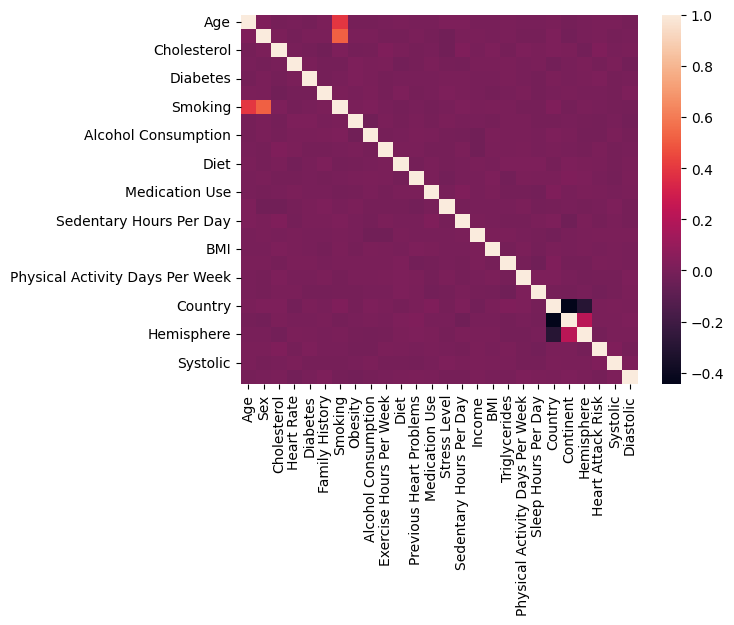

In [117]:
sns.heatmap(corr)